In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:

print(df.isnull().sum().max())

0


In [4]:
print(df.columns)
print(df.shape[0])

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
284807


In [5]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


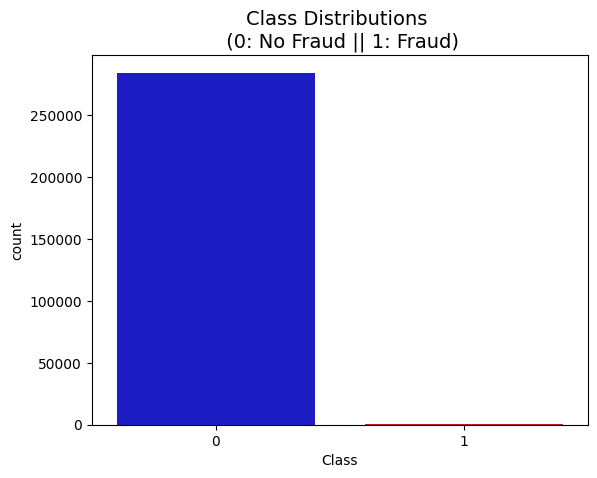

In [6]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [7]:
# Extract Transaction Hour
df['Time'] = (df['Time'] // 3600) % 24

# Display updated DataFrame
print(df.head())



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   0.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   0.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   0.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
print("Time Feature Summary:")
print(f"Min: {df['Time'].min()}, Max: {df['Time'].max()}")
print("Sample Time Values:", df['Time'].unique())

Time Feature Summary:
Min: 0.0, Max: 23.0
Sample Time Values: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]


In [8]:

from sklearn.preprocessing import  RobustScaler

# RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.666667,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-1.666667,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.666667,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-1.666667,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.666667,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']



original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


In [12]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1][:30]
non_fraud_df = df.loc[df['Class'] == 0][:30]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)


new_df= df


print(new_df.head())
print(new_df.shape[0])

        scaled_amount  scaled_time        V1        V2        V3        V4  \
180613       1.075945    -0.555556 -0.230220 -0.059314 -0.013675 -1.842287   
195554       1.089918    -0.333333  1.980380 -1.328678 -0.433727 -0.732884   
196059      -0.278209    -0.333333  2.247036 -0.700593 -1.195389 -0.910226   
240683      -0.234193     0.222222 -0.957801  0.539789  0.253061 -0.861494   
134214       0.195347     0.777778  1.054471 -0.219979  1.116044  1.595112   

              V5        V6        V7        V8  ...       V20       V21  \
180613 -0.477066  0.295980 -1.494384 -2.427844  ...  0.821146 -0.958366   
195554 -1.465464 -0.763121 -1.042751 -0.086433  ...  0.094087  0.446991   
196059 -0.682240 -1.294083 -0.454636 -0.356013  ... -0.072926  0.332251   
240683  1.293125  2.436142  0.012886  0.206745  ... -0.293173  0.406834   
134214 -0.662571  0.662023 -0.503124  0.283220  ... -0.076382 -0.392754   

             V22       V23       V24       V25       V26       V27       V28  \


In [13]:
print(original_ytest.shape[0])
print(original_ytrain.shape[0])

56962
227845


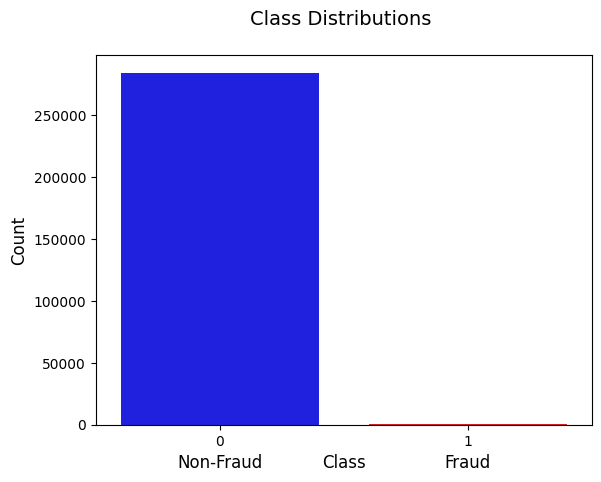

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_df' is already defined and contains the 'Class' column
colors = ["blue", "red"]  # Adjust the colors if needed

# Plotting the countplot
sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Class Distributions \n', fontsize=14)

# Adding labels below the bars
plt.text(0, -35000, 'Non-Fraud', ha='center', fontsize=12, color='black')  # Label for '0'
plt.text(1, -35000, 'Fraud', ha='center', fontsize=12, color='black')  # Label for '1'

# Display the plot
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


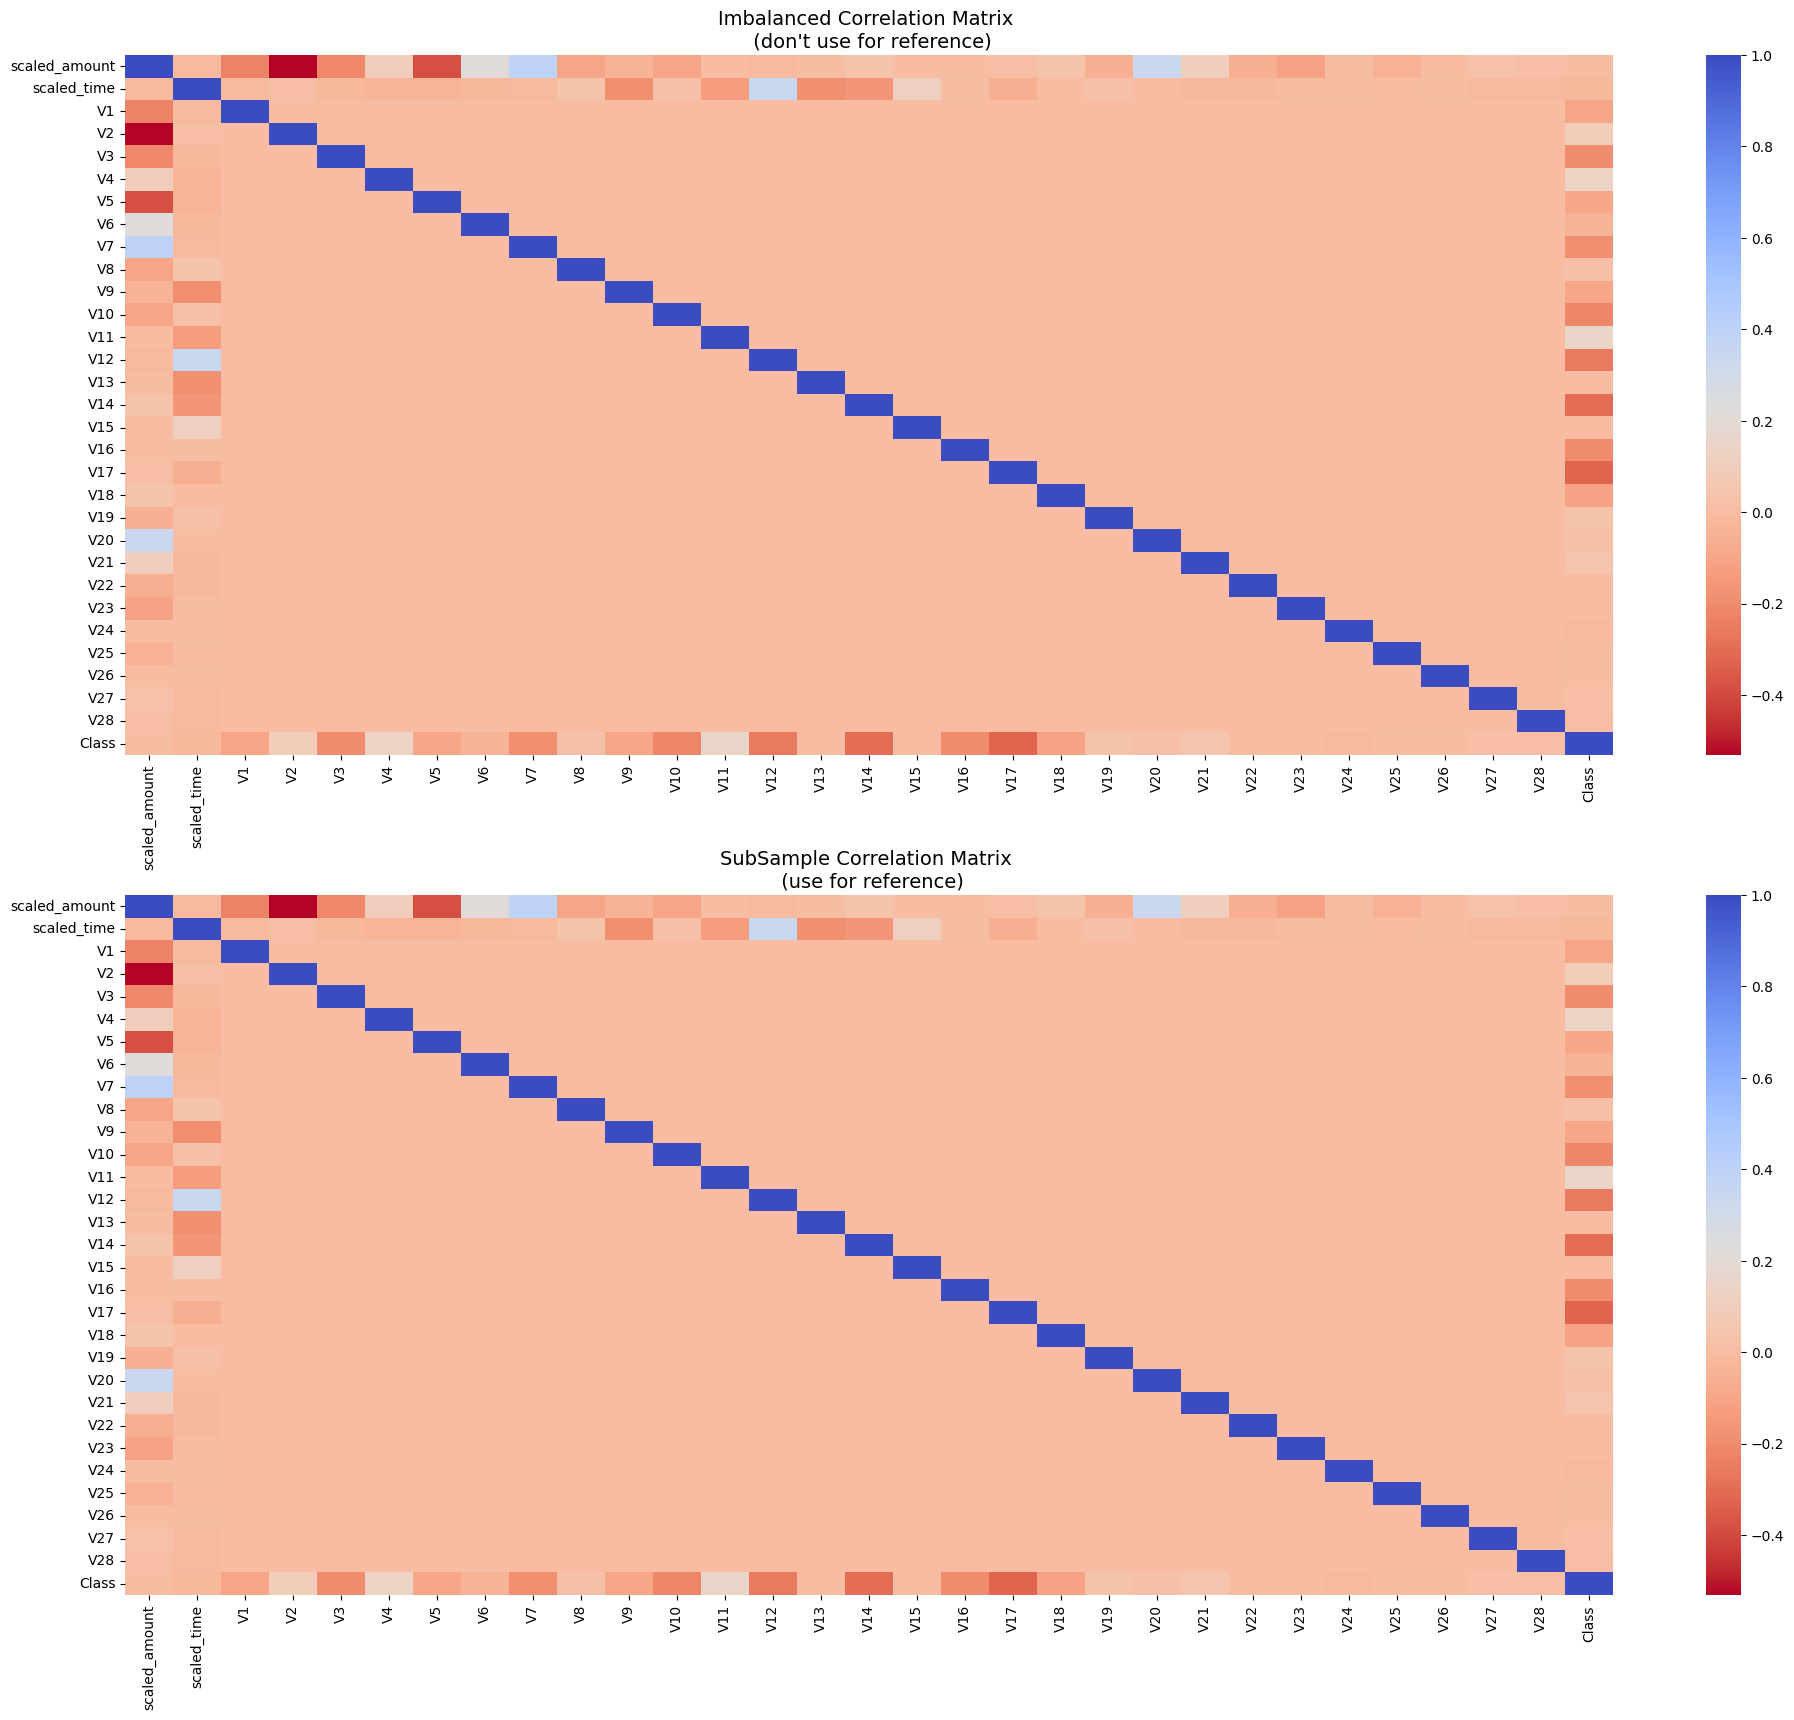

In [13]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

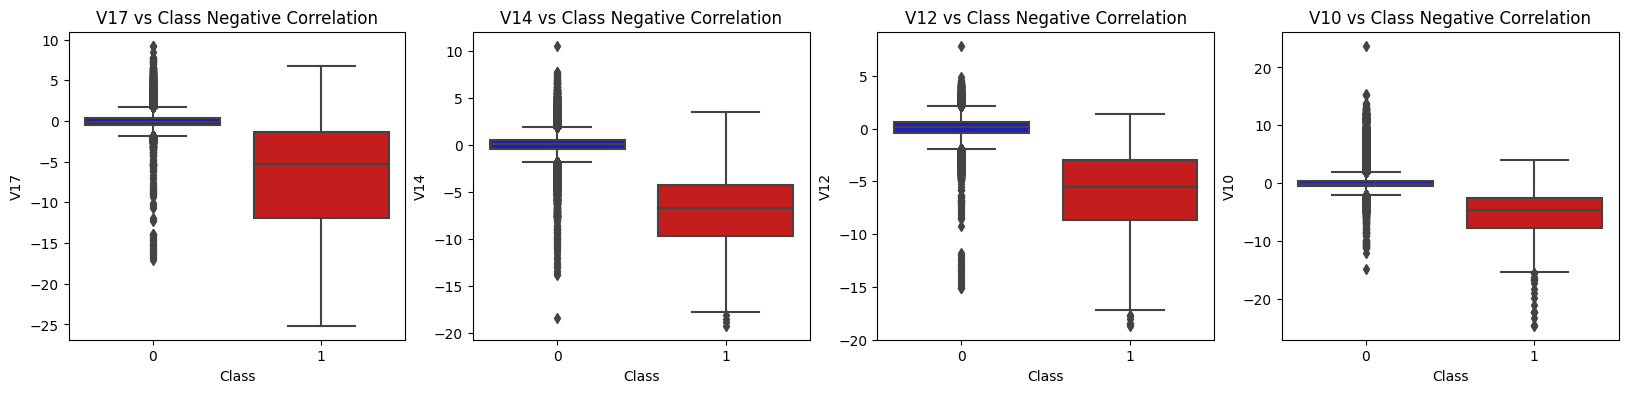

In [14]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

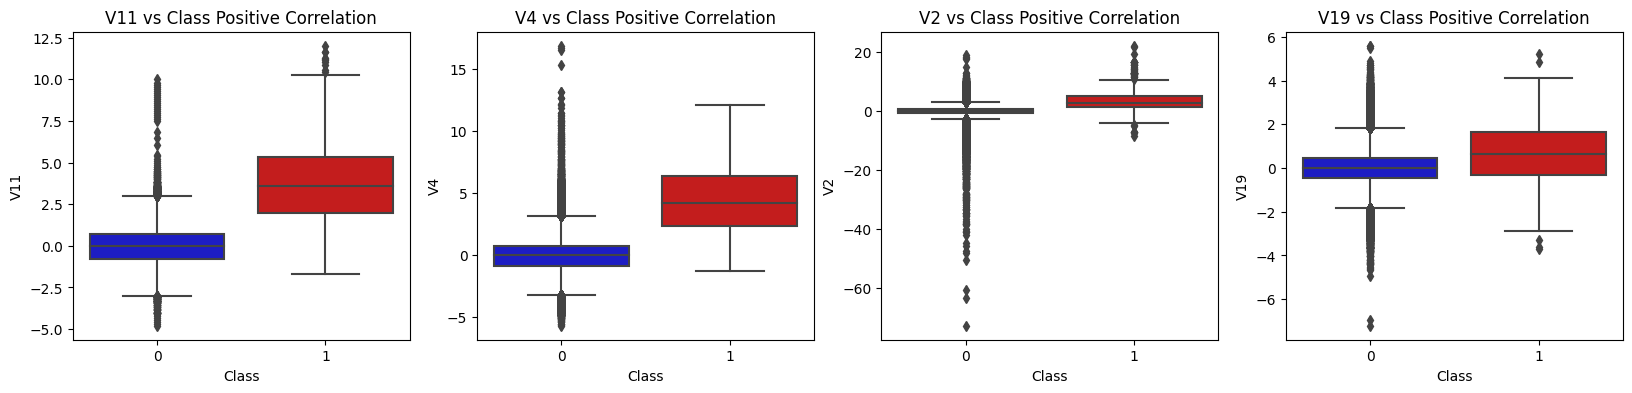

In [15]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

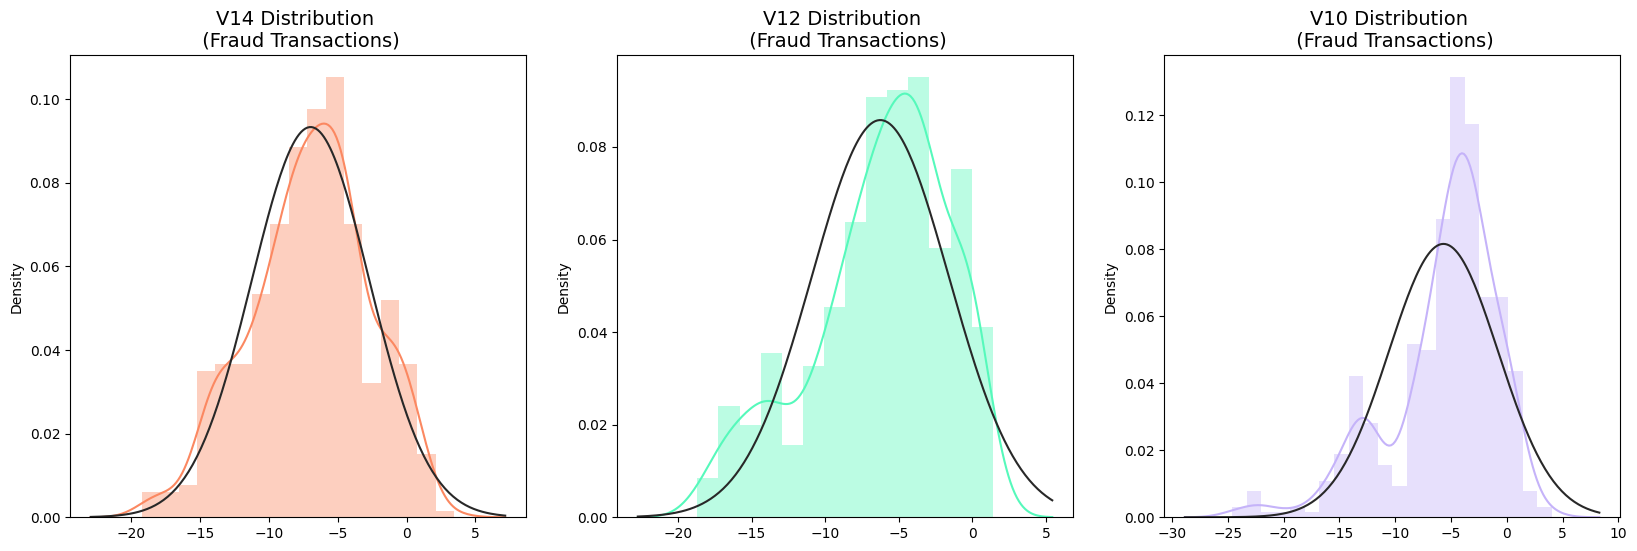

In [16]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split


X = new_df.drop('Class', axis=1)  # Drop target column
y = new_df['Class']  # Target column

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y )

# Step 1: Train a RandomForestClassifier to determine feature importance
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 2: Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Step 3: Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)




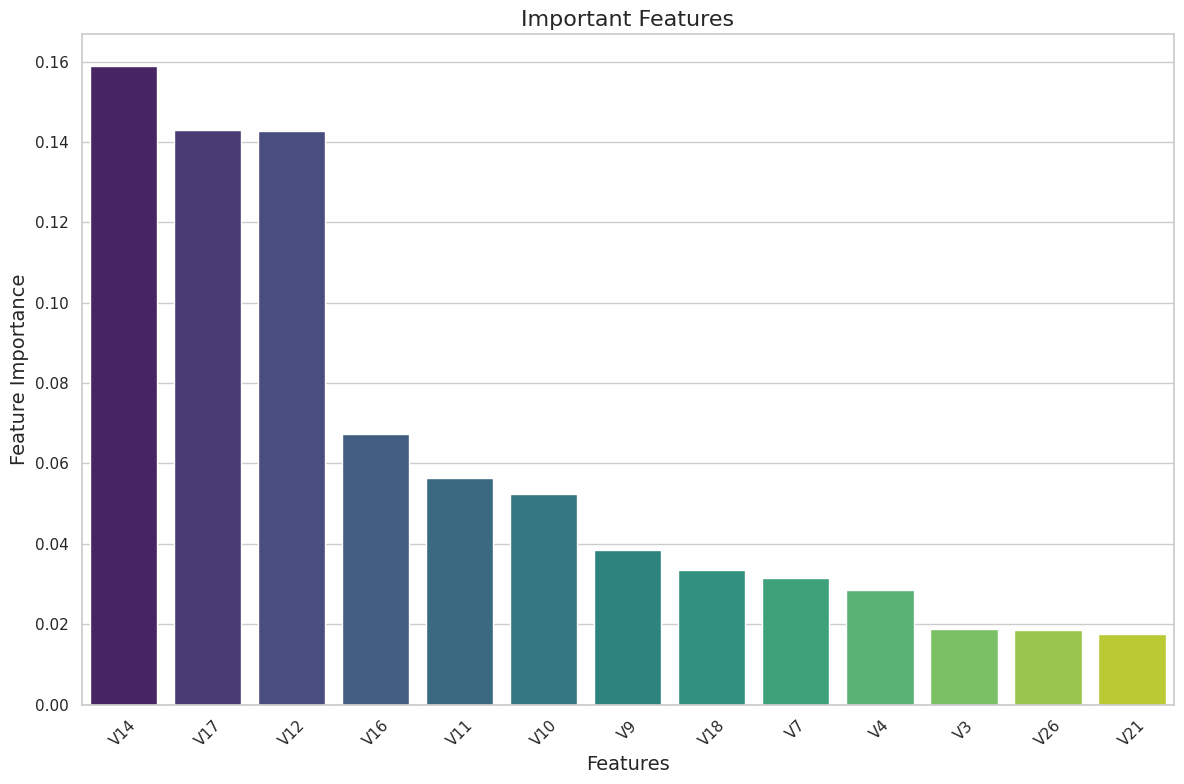

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot style
sns.set(style="whitegrid")

# Plot the top features with swapped axes
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df.head(13), palette="viridis")

# Add titles and labels
plt.title('Important Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Feature Importance', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [21]:
# Print the feature importance rankings
print("Feature Importances:")
print(feature_importance_df)

# Step 4: Select only the most important features (threshold: top N features or importance > some value)
top_features = feature_importance_df[feature_importance_df['Importance'] > 0.015]['Feature']
print("\nSelected Features:")
print(top_features)

# Step 5: Create a new DataFrame with the selected features
X_selected = X_train[top_features]
new_selected_df = pd.concat([X_selected, y_train], axis=1)  # Combine with target 'Class'

# Display the new DataFrame
print("\nNew DataFrame with Selected Features:")
print(new_selected_df.head())
print("Shape of new DataFrame:", new_selected_df.shape)

Feature Importances:
          Feature  Importance
15            V14    0.158838
18            V17    0.143073
13            V12    0.142623
17            V16    0.067250
12            V11    0.056497
11            V10    0.052287
10             V9    0.038438
19            V18    0.033575
8              V7    0.031577
5              V4    0.028399
4              V3    0.018690
27            V26    0.018462
22            V21    0.017527
2              V1    0.014383
9              V8    0.014116
21            V20    0.013254
28            V27    0.013128
3              V2    0.013091
6              V5    0.012611
16            V15    0.011665
14            V13    0.011570
20            V19    0.011457
0   scaled_amount    0.011120
7              V6    0.011018
23            V22    0.010510
29            V28    0.010183
25            V24    0.009800
26            V25    0.008780
24            V23    0.008131
1     scaled_time    0.007949

Selected Features:
15    V14
18    V17
13    V12

In [22]:
def remove_outliers(X_train, y_train):
    # For simplicity, using V14, V12, V10 as examples of feature columns that we want to remove outliers from
    
    # V14 outlier removal
    v14_fraud = X_train['V14'].loc[y_train == 1].values
    q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
    v14_iqr = q75 - q25
    v14_cut_off = v14_iqr * 1.5
    v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
    outliers_v14 = X_train[(X_train['V14'] < v14_lower) | (X_train['V14'] > v14_upper)].index

    # V12 outlier removal
    v12_fraud = X_train['V12'].loc[y_train == 1].values
    q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
    v12_iqr = q75 - q25
    v12_cut_off = v12_iqr * 1.5
    v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
    outliers_v12 = X_train[(X_train['V12'] < v12_lower) | (X_train['V12'] > v12_upper)].index

    # V10 outlier removal
    v10_fraud = X_train['V10'].loc[y_train == 1].values
    q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
    v10_iqr = q75 - q25
    v10_cut_off = v10_iqr * 1.5
    v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
    outliers_v10 = X_train[(X_train['V10'] < v10_lower) | (X_train['V10'] > v10_upper)].index

    # Combine all outlier indices
    all_outliers = set(outliers_v14) | set(outliers_v12) | set(outliers_v10)

    # Remove outliers from both X_train and y_train
    X_train_cleaned = X_train.drop(index=all_outliers)
    y_train_cleaned = y_train.drop(index=all_outliers)

    return X_train_cleaned, y_train_cleaned




In [23]:
# X_train_cleaned, y_train_cleaned = remove_outliers(X_train, y_train)
X_train_cleaned, y_train_cleaned = remove_outliers(X_selected, y_train)
# Print the number of instances after outlier removal in the training set
print('Number of Instances after outliers removal in Training Set: {}'.format(len(X_train_cleaned)))
print('Number of Instances after outliers removal in Training Set: {}'.format(len( y_train_cleaned)))

Number of Instances after outliers removal in Training Set: 226628
Number of Instances after outliers removal in Training Set: 226628


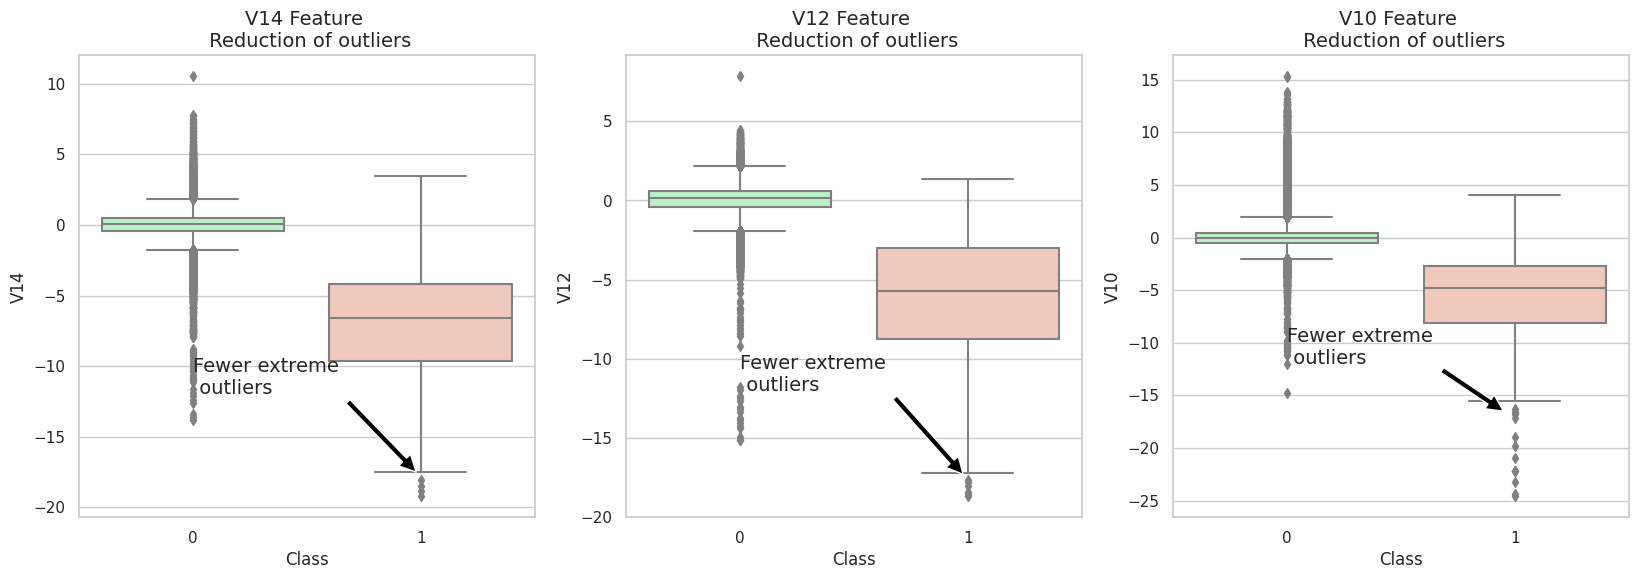

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the features (X_train) with the target (y_train) into the new DataFrame called 'training_set'
training_set = X_train.copy()
training_set['Class'] = y_train

# Create subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Define colors
colors = ['#B3F9C5', '#f9c5b3']

# Boxplot for V14 feature after outlier removal in training data
sns.boxplot(x="Class", y="V14", data=training_set, ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Boxplot for V12 feature after outlier removal in training data
sns.boxplot(x="Class", y="V12", data=training_set, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Boxplot for V10 feature after outlier removal in training data
sns.boxplot(x="Class", y="V10", data=training_set, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Display the plots
plt.show()


In [25]:
print(new_df.shape[0])
print(training_set.shape[0])

284807
227845


In [ ]:
# --- Random Search Parameters and Setup ---

import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import numpy as np
import warnings

warnings.filterwarnings("ignore")  

# Define parameters for RandomizedSearchCV for each model
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
adaboost_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]}
gb_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]}
xgb_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7]}
catboost_params = {'iterations': [50, 100, 150], 'depth': [5, 7, 10], 'learning_rate': [0.01, 0.1, 0.3]}
lgb_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [5, 7, 10]}

# Initialize StratifiedKFold for cross-validation
sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Sampling techniques
sampling_techniques = [
    ('SMOTE', SMOTE(sampling_strategy='minority')),
    ('TomekLinks', TomekLinks(sampling_strategy='majority')),
    ('NearMiss', NearMiss(sampling_strategy='majority')),
    ('SMOTEENN', SMOTEENN(sampling_strategy='auto'))
]

# --- Perform Random Search to Determine Best Parameters ---

# List of classifiers
classifiers = {
    #'LogisticRegression': LogisticRegression(),
    #'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

# Parameter grids for each model
param_grids = {
    #'LogisticRegression': log_reg_params,
    #'RandomForest': rf_params,
    'AdaBoost': adaboost_params,
    'GradientBoosting': gb_params,
    'XGBoost': xgb_params,
    'LightGBM': lgb_params,
    'CatBoost': catboost_params
}

best_params = {}

for model_name, model in classifiers.items():
    print(f"Performing Random Search for {model_name}...")
    rand_search = RandomizedSearchCV(model, param_grids[model_name], n_iter=4, random_state=42, cv=3)
    rand_search.fit(X_train_cleaned, y_train_cleaned)
    best_params[model_name] = rand_search.best_params_
    print(f"Best Parameters for {model_name}: {best_params[model_name]}")



In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Initialize StratifiedKFold for cross-validation
sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# List of classifiers with manually specified hyperparameters
classifiers = {
    # 'LogisticRegression': LogisticRegression(penalty='l2', C=10),
    # 'RandomForest': RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2),
    # 'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=1),
    # 'GradientBoosting': GradientBoostingClassifier(n_estimators=150, learning_rate=0.01, max_depth=7),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=5),
    'LightGBM': lgb.LGBMClassifier(n_estimators=150, learning_rate=0.01, max_depth=10),
    # 'CatBoost': CatBoostClassifier(iterations=150, depth=5, learning_rate=0.3, verbose=0)
}

# Sampling techniques
sampling_techniques = [
    ('SMOTE', SMOTE(sampling_strategy='minority')),
    ('TomekLinks', TomekLinks(sampling_strategy='majority')),
    ('NearMiss', NearMiss(sampling_strategy='majority')),
    ('SMOTEENN', SMOTEENN(sampling_strategy='auto'))
]

# Ensure consistent columns between X_train_cleaned and X_test
X_test = X_test[X_train_cleaned.columns]

# Initialize a dictionary to store results
model_results = {}

# Loop through classifiers
for model_name, model in classifiers.items():
    print(f"Training and Evaluating {model_name}...")

    # Store results
    results = []

    # Loop through sampling techniques
    for sampler_name, sampler in sampling_techniques:
        print(f"Applying {sampler_name}...")

        accuracy_lst, precision_lst, recall_lst, f1_lst, auc_lst = [], [], [], [], []
        fold_conf_matrices = []
        all_fpr, all_tpr, all_roc_auc = [], [], []

        for i, (train, test) in enumerate(sss.split(X_train_cleaned, y_train_cleaned)):
            # Create pipeline
            pipeline = imbalanced_make_pipeline(sampler, model)
            pipeline.fit(X_train_cleaned.iloc[train], y_train_cleaned.iloc[train])

            # Predict
            prediction = pipeline.predict(X_train_cleaned.iloc[test])

            # Compute confusion matrix
            conf_matrix = confusion_matrix(y_train_cleaned.iloc[test], prediction)
            fold_conf_matrices.append((i + 1, conf_matrix))

            # Compute ROC curve and AUC
            probas = pipeline.predict_proba(X_train_cleaned.iloc[test])[:, 1]
            fpr, tpr, _ = roc_curve(y_train_cleaned.iloc[test], probas)
            roc_auc = auc(fpr, tpr)
            all_fpr.append(fpr)
            all_tpr.append(tpr)
            all_roc_auc.append(roc_auc)

            accuracy_lst.append(pipeline.score(X_train_cleaned.iloc[test], y_train_cleaned.iloc[test]))
            precision_lst.append(precision_score(y_train_cleaned.iloc[test], prediction))
            recall_lst.append(recall_score(y_train_cleaned.iloc[test], prediction))
            f1_lst.append(f1_score(y_train_cleaned.iloc[test], prediction))
            auc_lst.append(roc_auc)

        # Compute mean ROC curve
        mean_fpr = np.linspace(0, 1, 100)
        mean_tpr = np.mean([np.interp(mean_fpr, f, t) for f, t in zip(all_fpr, all_tpr)], axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)

        # Append results
        results.append({
            'Sampling Technique': sampler_name,
            'Accuracy': np.mean(accuracy_lst),
            'Precision': np.mean(precision_lst),
            'Recall': np.mean(recall_lst),
            'F1': np.mean(f1_lst),
            'AUC': np.mean(auc_lst),
            'Confusion Matrices': fold_conf_matrices
        })

    # Store DataFrame
    model_results[model_name] = pd.DataFrame(results)

# Print performance metrics in the desired format
print("\n--- Performance Metrics ---")
for model_name, df in model_results.items():
    print(f"\nResults for {model_name}:")
    print(df[['Sampling Technique', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC']].to_string(index=False))

# Print confusion matrices in the desired format
print("\n--- Confusion Matrices ---")
for model_name, df in model_results.items():
    print(f"\nResults for {model_name}:")
    for index, row in df.iterrows():
        print(f"Sampling Technique: {row['Sampling Technique']}")
        for fold, cm in row['Confusion Matrices']:
            print(f"Fold {fold} Confusion Matrix:\n{cm}")
        print('---' * 10)


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Initialize StratifiedKFold for cross-validation
sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# List of classifiers with manually specified hyperparameters
classifiers = {
    'LogisticRegression': LogisticRegression(penalty='l2', C=10),
    # 'RandomForest': RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=1),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=150, learning_rate=0.01, max_depth=7),
    # 'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=5),
    # 'LightGBM': lgb.LGBMClassifier(n_estimators=150, learning_rate=0.01, max_depth=10),
    # 'CatBoost': CatBoostClassifier(iterations=150, depth=5, learning_rate=0.3, verbose=0)
}

# Sampling techniques
sampling_techniques = [
    ('SMOTE', SMOTE(sampling_strategy='minority')),
    ('TomekLinks', TomekLinks(sampling_strategy='majority')),
    ('NearMiss', NearMiss(sampling_strategy='majority')),
    ('SMOTEENN', SMOTEENN(sampling_strategy='auto'))
]

# Ensure consistent columns between X_train_cleaned and X_test
X_test = X_test[X_train_cleaned.columns]

# Initialize a dictionary to store results
model_results = {}

# Loop through classifiers
for model_name, model in classifiers.items():
    print(f"Training and Evaluating {model_name}...")

    # Store results
    results = []

    # Loop through sampling techniques
    for sampler_name, sampler in sampling_techniques:
        print(f"Applying {sampler_name}...")

        accuracy_lst, precision_lst, recall_lst, f1_lst, auc_lst = [], [], [], [], []
        fold_conf_matrices = []
        all_fpr, all_tpr, all_roc_auc = [], [], []

        for i, (train, test) in enumerate(sss.split(X_train_cleaned, y_train_cleaned)):
            # Create pipeline
            pipeline = imbalanced_make_pipeline(sampler, model)
            pipeline.fit(X_train_cleaned.iloc[train], y_train_cleaned.iloc[train])

            # Predict
            prediction = pipeline.predict(X_train_cleaned.iloc[test])

            # Compute confusion matrix
            conf_matrix = confusion_matrix(y_train_cleaned.iloc[test], prediction)
            fold_conf_matrices.append((i + 1, conf_matrix))

            # Compute ROC curve and AUC
            probas = pipeline.predict_proba(X_train_cleaned.iloc[test])[:, 1]
            fpr, tpr, _ = roc_curve(y_train_cleaned.iloc[test], probas)
            roc_auc = auc(fpr, tpr)
            all_fpr.append(fpr)
            all_tpr.append(tpr)
            all_roc_auc.append(roc_auc)

            accuracy_lst.append(pipeline.score(X_train_cleaned.iloc[test], y_train_cleaned.iloc[test]))
            precision_lst.append(precision_score(y_train_cleaned.iloc[test], prediction))
            recall_lst.append(recall_score(y_train_cleaned.iloc[test], prediction))
            f1_lst.append(f1_score(y_train_cleaned.iloc[test], prediction))
            auc_lst.append(roc_auc)

        # Compute mean ROC curve
        mean_fpr = np.linspace(0, 1, 100)
        mean_tpr = np.mean([np.interp(mean_fpr, f, t) for f, t in zip(all_fpr, all_tpr)], axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)

        # Append results
        results.append({
            'Sampling Technique': sampler_name,
            'Accuracy': np.mean(accuracy_lst),
            'Precision': np.mean(precision_lst),
            'Recall': np.mean(recall_lst),
            'F1': np.mean(f1_lst),
            'AUC': np.mean(auc_lst),
            'Confusion Matrices': fold_conf_matrices
        })

    # Store DataFrame
    model_results[model_name] = pd.DataFrame(results)

# Print performance metrics in the desired format
print("\n--- Performance Metrics ---")
for model_name, df in model_results.items():
    print(f"\nResults for {model_name}:")
    print(df[['Sampling Technique', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC']].to_string(index=False))

# Print confusion matrices in the desired format
print("\n--- Confusion Matrices ---")
for model_name, df in model_results.items():
    print(f"\nResults for {model_name}:")
    for index, row in df.iterrows():
        print(f"Sampling Technique: {row['Sampling Technique']}")
        for fold, cm in row['Confusion Matrices']:
            print(f"Fold {fold} Confusion Matrix:\n{cm}")
        print('---' * 10)


In [ ]:
# import pandas as pd
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss
# from imblearn.combine import SMOTEENN
# from imblearn.under_sampling import TomekLinks
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from sklearn.linear_model import LogisticRegression
# import lightgbm as lgb
# import numpy as np
# import matplotlib.pyplot as plt
# import warnings

# warnings.filterwarnings("ignore")

# # Initialize StratifiedKFold for cross-validation
# sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# # List of classifiers with manually specified hyperparameters
# classifiers = {
#     # 'LogisticRegression': LogisticRegression(penalty='l2', C=10),
#     # 'RandomForest': RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2),
#     # 'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=1),
#     # 'GradientBoosting': GradientBoostingClassifier(n_estimators=150, learning_rate=0.01, max_depth=7),
#     # 'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=5),
#     'LightGBM': lgb.LGBMClassifier(n_estimators=150, learning_rate=0.01, max_depth=10),
#     'CatBoost': CatBoostClassifier(iterations=150, depth=5, learning_rate=0.3, verbose=0)
# }

# # Sampling techniques
# sampling_techniques = [
#     ('SMOTE', SMOTE(sampling_strategy='minority')),
#     ('TomekLinks', TomekLinks(sampling_strategy='majority')),
#     ('NearMiss', NearMiss(sampling_strategy='majority')),
#     ('SMOTEENN', SMOTEENN(sampling_strategy='auto'))
# ]

# # Ensure consistent columns between X_train_cleaned and X_test
# X_test = X_test[X_train_cleaned.columns]

# # Initialize a dictionary to store results
# model_results = {}

# # Loop through classifiers
# for model_name, model in classifiers.items():
#     print(f"Training and Evaluating {model_name}...")

#     # Store results
#     results = []

#     # Loop through sampling techniques
#     for sampler_name, sampler in sampling_techniques:
#         print(f"Applying {sampler_name}...")

#         accuracy_lst, precision_lst, recall_lst, f1_lst, auc_lst = [], [], [], [], []
#         fold_conf_matrices = []
#         all_fpr, all_tpr, all_roc_auc = [], [], []

#         for i, (train, test) in enumerate(sss.split(X_train_cleaned, y_train_cleaned)):
#             # Create pipeline
#             pipeline = imbalanced_make_pipeline(sampler, model)
#             pipeline.fit(X_train_cleaned.iloc[train], y_train_cleaned.iloc[train])

#             # Predict
#             prediction = pipeline.predict(X_train_cleaned.iloc[test])

#             # Compute confusion matrix
#             conf_matrix = confusion_matrix(y_train_cleaned.iloc[test], prediction)
#             fold_conf_matrices.append((i + 1, conf_matrix))

#             # Compute ROC curve and AUC
#             probas = pipeline.predict_proba(X_train_cleaned.iloc[test])[:, 1]
#             fpr, tpr, _ = roc_curve(y_train_cleaned.iloc[test], probas)
#             roc_auc = auc(fpr, tpr)
#             all_fpr.append(fpr)
#             all_tpr.append(tpr)
#             all_roc_auc.append(roc_auc)

#             accuracy_lst.append(pipeline.score(X_train_cleaned.iloc[test], y_train_cleaned.iloc[test]))
#             precision_lst.append(precision_score(y_train_cleaned.iloc[test], prediction))
#             recall_lst.append(recall_score(y_train_cleaned.iloc[test], prediction))
#             f1_lst.append(f1_score(y_train_cleaned.iloc[test], prediction))
#             auc_lst.append(roc_auc)

#         # Compute mean ROC curve
#         mean_fpr = np.linspace(0, 1, 100)
#         mean_tpr = np.mean([np.interp(mean_fpr, f, t) for f, t in zip(all_fpr, all_tpr)], axis=0)
#         mean_tpr[-1] = 1.0
#         mean_auc = auc(mean_fpr, mean_tpr)

#         # Append results
#         results.append({
#             'Sampling Technique': sampler_name,
#             'Accuracy': np.mean(accuracy_lst),
#             'Precision': np.mean(precision_lst),
#             'Recall': np.mean(recall_lst),
#             'F1': np.mean(f1_lst),
#             'AUC': np.mean(auc_lst),
#             'Confusion Matrices': fold_conf_matrices
#         })

#     # Store DataFrame
#     model_results[model_name] = pd.DataFrame(results)

# # Print performance metrics in the desired format
# print("\n--- Performance Metrics ---")
# for model_name, df in model_results.items():
#     print(f"\nResults for {model_name}:")
#     print(df[['Sampling Technique', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC']].to_string(index=False))

# # Print confusion matrices in the desired format
# print("\n--- Confusion Matrices ---")
# for model_name, df in model_results.items():
#     print(f"\nResults for {model_name}:")
#     for index, row in df.iterrows():
#         print(f"Sampling Technique: {row['Sampling Technique']}")
#         for fold, cm in row['Confusion Matrices']:
#             print(f"Fold {fold} Confusion Matrix:\n{cm}")
#         print('---' * 10)


In [ ]:
# import pandas as pd
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss
# from imblearn.combine import SMOTEENN
# from imblearn.under_sampling import TomekLinks
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from sklearn.linear_model import LogisticRegression
# import lightgbm as lgb
# import numpy as np
# import matplotlib.pyplot as plt
# import warnings

# warnings.filterwarnings("ignore")

# # Initialize StratifiedKFold for cross-validation
# sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# # List of classifiers with manually specified hyperparameters
# classifiers = {
#     'LogisticRegression': LogisticRegression(penalty='l2', C=10),
#     'RandomForest': RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2),
#     'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=1),
#     'GradientBoosting': GradientBoostingClassifier(n_estimators=150, learning_rate=0.01, max_depth=7),
#     'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=5),
#     'LightGBM': lgb.LGBMClassifier(n_estimators=150, learning_rate=0.01, max_depth=10),
#     'CatBoost': CatBoostClassifier(iterations=150, depth=5, learning_rate=0.3, verbose=0)
# }

# # Sampling techniques
# sampling_techniques = [
#     ('SMOTE', SMOTE(sampling_strategy='minority')),
#     ('TomekLinks', TomekLinks(sampling_strategy='majority')),
#     ('NearMiss', NearMiss(sampling_strategy='majority')),
#     ('SMOTEENN', SMOTEENN(sampling_strategy='auto'))
# ]

# # Ensure consistent columns between X_train_cleaned and X_test
# X_test = X_test[X_train_cleaned.columns]

# # Initialize a dictionary to store results
# model_results = {}

# # Loop through classifiers
# for model_name, model in classifiers.items():
#     print(f"Training and Evaluating {model_name}...")

#     # Store results
#     results = []

#     # Loop through sampling techniques
#     for sampler_name, sampler in sampling_techniques:
#         print(f"Applying {sampler_name}...")

#         accuracy_lst, precision_lst, recall_lst, f1_lst, auc_lst = [], [], [], [], []
#         avg_conf_matrix = np.zeros((2, 2))
#         all_fpr, all_tpr, all_roc_auc = [], [], []

#         plt.figure(figsize=(10, 8))
#         colors = ['b', 'g', 'r', 'c', 'm']  # Colors for each fold

#         for i, (train, test) in enumerate(sss.split(X_train_cleaned, y_train_cleaned)):
#             # Create pipeline
#             pipeline = imbalanced_make_pipeline(sampler, model)
#             pipeline.fit(X_train_cleaned.iloc[train], y_train_cleaned.iloc[train])

#             # Predict
#             prediction = pipeline.predict(X_train_cleaned.iloc[test])

#             # Compute confusion matrix
#             conf_matrix = confusion_matrix(y_train_cleaned.iloc[test], prediction)
#             avg_conf_matrix += conf_matrix

#             # Compute ROC curve and AUC
#             probas = pipeline.predict_proba(X_train_cleaned.iloc[test])[:, 1]
#             fpr, tpr, _ = roc_curve(y_train_cleaned.iloc[test], probas)
#             roc_auc = auc(fpr, tpr)
#             all_fpr.append(fpr)
#             all_tpr.append(tpr)
#             all_roc_auc.append(roc_auc)

#             # Plot ROC curve for this fold
#             plt.plot(fpr, tpr, color=colors[i], alpha=0.6, label=f'Fold {i+1} ROC (AUC = {roc_auc:.2f})')

#             accuracy_lst.append(pipeline.score(X_train_cleaned.iloc[test], y_train_cleaned.iloc[test]))
#             precision_lst.append(precision_score(y_train_cleaned.iloc[test], prediction))
#             recall_lst.append(recall_score(y_train_cleaned.iloc[test], prediction))
#             f1_lst.append(f1_score(y_train_cleaned.iloc[test], prediction))
#             auc_lst.append(roc_auc)

#         avg_conf_matrix /= sss.get_n_splits()

#         # Compute mean ROC curve
#         mean_fpr = np.linspace(0, 1, 100)
#         mean_tpr = np.mean([np.interp(mean_fpr, f, t) for f, t in zip(all_fpr, all_tpr)], axis=0)
#         mean_tpr[-1] = 1.0
#         mean_auc = auc(mean_fpr, mean_tpr)

#         # Plot mean ROC curve
#         plt.plot(mean_fpr, mean_tpr, color='black', linestyle='--', label=f'Mean ROC (AUC = {mean_auc:.2f})')
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.title(f'ROC Curve for {model_name} with {sampler_name}')
#         plt.legend()
#         plt.show()

#         # Append results
#         results.append({
#             'Sampling Technique': sampler_name,
#             'Accuracy': np.mean(accuracy_lst),
#             'Precision': np.mean(precision_lst),
#             'Recall': np.mean(recall_lst),
#             'F1': np.mean(f1_lst),
#             'AUC': np.mean(auc_lst),
#             'Confusion Matrix': avg_conf_matrix
#         })

#     # Store DataFrame
#     model_results[model_name] = pd.DataFrame(results)

# # Print results
# for model_name, df in model_results.items():
#     print(f"\n--- Results for {model_name} ---")
#     print(df.to_string(index=False))
#     print('---' * 20)


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from imblearn.under_sampling import TomekLinks

# Voting Classifier setup
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

tomek = TomekLinks()
X_train_cleaned, y_train_cleaned = tomek.fit_resample(original_Xtrain,original_ytrain)

# Check the new class distribution
unique, counts = np.unique(y_train_cleaned, return_counts=True)
print(f"Class distribution after TomekLinks: {dict(zip(unique, counts))}")

# Instantiate the top models
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2, random_state=42)
cb = CatBoostClassifier(iterations=150, depth=5, learning_rate=0.3, verbose=0, random_state=42)

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('RandomForest', rf), ('CatBoost', cb)],
    voting='soft'
)

# Define 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metrics for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Perform 5-fold cross-validation
print("Performing 5-Fold Cross-Validation on Voting Classifier...")

results = {}
for metric in scoring:
    scores = cross_val_score(voting_clf, X_train_cleaned, y_train_cleaned, cv=cv, scoring=scoring[metric], n_jobs=-1)
    results[metric] = scores

# Print mean scores
print("\n--- 5-Fold Cross-Validation Results ---")
for metric, scores in results.items():
    print(f"{metric.capitalize()}: Mean = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

Class distribution after TomekLinks: {0: 227432, 1: 394}
Performing 5-Fold Cross-Validation on Voting Classifier...


In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer
import shap
# Fit the pipeline on the training data
best_pipeline.fit(last_fold_X_train, last_fold_y_train)
# Initialize SHAP explainer visualization support
shap.initjs()

# Use only one model (RandomForest) for simplicity; replace it with VotingClassifier if needed
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)


fold_idx = 0  # Track fold index

last_fold_X_train, last_fold_X_test = X_train_cleaned, X_test
last_fold_y_train, last_fold_y_test = y_train_cleaned, y_test
best_pipeline = pipeline  

        


print("\n--- LIME Explanations on Last Fold ---")

# Initialize LIME Explainer
lime_explainer = LimeTabularExplainer(
    training_data=last_fold_X_train.values,
    feature_names=last_fold_X_train.columns,
    class_names=["Not Fraud", "Fraud"],
    mode="classification"
)

# Select a sample to explain (first instance in test data)
sample_idx = 0
sample = last_fold_X_test.iloc[sample_idx].values
print(f"Explaining instance {sample_idx} from test set.")

# Generate explanation
lime_exp = lime_explainer.explain_instance(
    data_row=sample,
    predict_fn=best_pipeline.predict_proba
)

# Show explanation
lime_exp.show_in_notebook()  # Use this in Jupyter Notebook
print(lime_exp.as_list())

# ==================== SHAP Explanation ====================
print("\n--- SHAP Explanations on Last Fold ---")

# Initialize SHAP Explainer
shap_explainer = shap.Explainer(best_pipeline.steps[-1][1], last_fold_X_train)

# Calculate SHAP values for test data
shap_values = shap_explainer(last_fold_X_test)




In [ ]:
print(last_fold_X_test.shape)
print(shap_values.shape)

In [ ]:
import matplotlib.pyplot as plt

# --- SHAP Summary Plot ---
print("\n--- SHAP Summary Plot ---")
shap.summary_plot(shap_values.values, last_fold_X_test)

# --- SHAP Violin Plot ---
print("\n--- SHAP Violin Plot ---")
shap.summary_plot(shap_values.values, last_fold_X_test, plot_type="violin")
